# Loading and inspecting the dataset

In the first step we will:

- Load the CSV file from GitHub
- Check how many rows and columns we have
- Display the first few rows
- Review the data types and basic metadata for each column

This will help us understand better the data we work with.


<a href="https://colab.research.google.com/github/VladutFlorian28/Product-category-prediction-based-on-title/blob/main/Product_category_prediction_based_on_title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/VladutFlorian28/Product-category-prediction-based-on-title/main/data/products.csv"
df = pd.read_csv(url)

print("Dataset shape (rows, columns):", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("Dataset info:")
print(df.info())

Dataset shape (rows, columns): (35311, 8)

First 5 rows of the dataset:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0     

# Checking the missing values
Missing data can cause problems during analysis or model training. Here we will do:

- Count the number of missing values(Nan) per column
- Visualize missing values using a heatmap

In [24]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


In [ ]:
#Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# Category analysis
Lets check how many categories are and how are those named. This will help us:

Understand the balance between classes
See if the dataset is skewed

In [28]:
category_counts = df[' Category Label'].str.lower().value_counts()
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
fridge freezers     5495
washing machines    4036
mobile phones       4020
cpus                3771
tvs                 3564
fridges             3457
dishwashers         3418
digital cameras     2696
microwaves          2338
freezers            2210
fridge               123
cpu                   84
mobile phone          55
Name: count, dtype: int64


# This code visualizes the distribution of sentiments in our dataset using a bar chart. It helps us:

- Quickly see how many reviews are positive, negative, or neutral
- Understand the balance between sentiment classes
- Identify if the dataset is skewed toward a particular sentiment
- Gain a visual overview of the overall sentiment trends


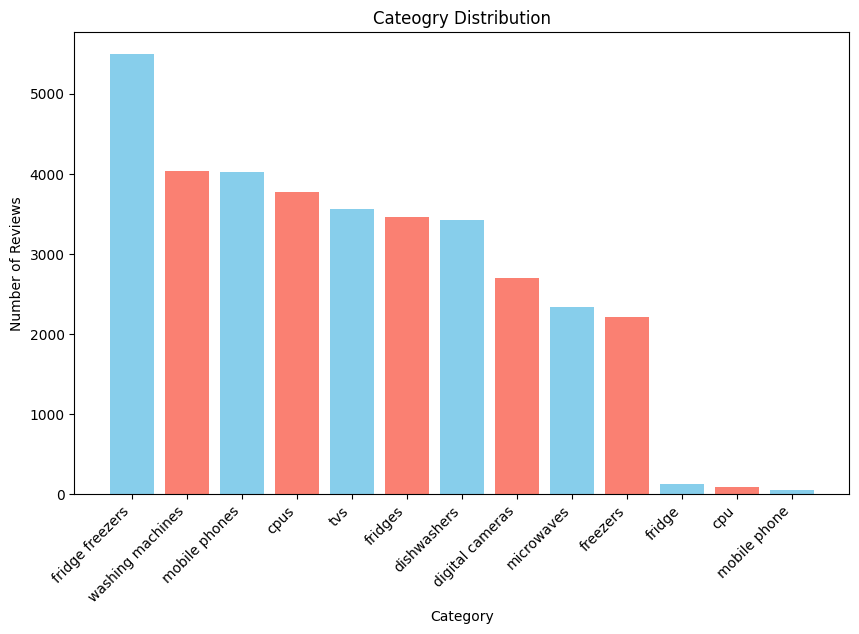

In [31]:
# Plot category distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Cateogry Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45 , ha='right')
plt.show()

In [ ]:
# 1. Check the data type of the 'Merchant Rating' column
print("Data type of product_price column:", df['Merchant Rating'].dtype)
# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['Merchant Rating'].head(10))
# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['Merchant Rating'].value_counts().head(20))
# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['Merchant Rating'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['Merchant Rating']].drop_duplicates())



Data type of product_price column: float64

First 10 values in product_price column:
0    2.5
1    4.8
2    3.9
3    3.4
4    1.6
5    1.6
6    1.2
7    4.5
8    3.4
9    3.8
Name: Merchant Rating, dtype: float64

Top 20 most frequent values in product_price column:
Merchant Rating
2.6    938
3.0    932
1.4    918
1.9    917
4.6    915
3.4    913
3.6    911
2.3    906
1.3    905
4.3    899
2.4    895
3.9    894
1.7    893
3.7    892
1.2    891
3.5    888
3.8    888
2.7    881
3.3    880
3.2    874
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,Merchant Rating


## Converting 'Listing Date' to Datetime

The code below converts the `'Listing Date'` column from an object (string) type to a datetime type. This allows us to:

- Perform date-based operations like sorting, filtering, or extracting year/month/day.
- Handle invalid or missing dates gracefully with `errors='coerce'` (these will become `NaT`).
- Ensure consistency in the dataset for analysis or visualization.

We also strip any extra spaces from column names to avoid errors when accessing them.



In [ ]:

df.columns = df.columns.str.strip()


df['Listing Date'] = pd.to_datetime(df['Listing Date'], errors='coerce')
print("\nAfter conversion, data type of Listing Date column:", df['Listing Date'].dtype)




After conversion, data type of Listing Date column: datetime64[ns]
